In [2]:
import sqlite3
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()


In [3]:
import pandas as pd
cur.execute('''SELECT * FROM matches''')
matches = pd.DataFrame(cur.fetchall())
matches.columns = (x[0] for x in cur.description)
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [4]:
#retrieving 2011 seasons game
yr_11 = pd.DataFrame(cur.execute('''SELECT * FROM matches WHERE season == 2011''').fetchall())
yr_11.columns = [x[0] for x in cur.description]
yr_11.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [5]:
away_wins = yr_11[yr_11['FTR'] =='A']['AwayTeam'].value_counts()

In [6]:
home_wins = yr_11[yr_11['FTR'] =='H']['HomeTeam'].value_counts()

In [7]:
wins=away_wins+home_wins
total_wins=pd.DataFrame({'team':wins.index, 'total_wins':wins.values})



In [9]:
away_loss = yr_11[yr_11['FTR'] =='D']['AwayTeam'].value_counts()

In [10]:
home_loss = yr_11[yr_11['FTR'] =='D']['HomeTeam'].value_counts()

In [12]:
loss=away_loss+home_loss
total_loss=pd.DataFrame({'team':loss.index, 'total_loss':loss.values})
result = pd.merge(total_wins, total_loss, on='team')
result.head()

,team,total_wins,total_loss
0,Aachen,6,13
1,Arsenal,21,7
2,Aston Villa,7,17
3,Augsburg,8,14
4,Bayern Munich,23,4


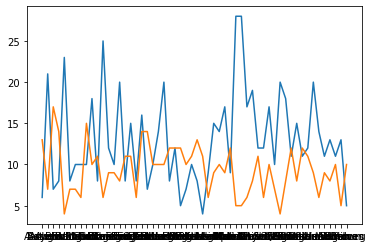

In [18]:
import matplotlib.pyplot as plt
# Make the plot
plt.figure(figsize=(6, 4))




plt.plot(result['team'],result['total_wins'],)
plt.plot(result['team'], result['total_loss'])

plt.show()

In [45]:
cur.execute("""Select Season , Date , HomeTeam AS team  ,Div, sum(FTHG),FTR
               From Matches
               Where Season == '2011'
               and  Div != 'E0'
               Group By HomeTeam
;""")

In [46]:
df = pd.DataFrame(cur.fetchall())
df.columns = (x[0] for x in cur.description)
df.head()

,Season,Date,team,Div,sum(FTHG),FTR
0,2011,2012-03-30,Aachen,D2,15,A
1,2011,2011-11-06,Augsburg,D1,20,A
2,2011,2011-11-19,Bayern Munich,D1,49,A
3,2011,2012-03-02,Bochum,D2,23,A
4,2011,2011-10-22,Braunschweig,D2,21,A


In [47]:
cur.execute("""Select Season , Date , AwayTeam AS team ,Div, sum(FTAG),FTR
               From Matches
               Where Season == '2011'
               and  Div != 'E0'
               Group By AwayTeam
;""")

In [48]:
df1 = pd.DataFrame(cur.fetchall())
df1.columns = (x[0] for x in cur.description)
df1.head()
# df1.columns=['Season','Date','Team','Div','Total_Goals','FTR']

,Season,Date,team,Div,sum(FTAG),FTR
0,2011,2011-11-20,Aachen,D2,15,H
1,2011,2011-08-27,Augsburg,D1,16,H
2,2011,2012-03-31,Bayern Munich,D1,28,A
3,2011,2011-11-27,Bochum,D2,18,H
4,2011,2011-11-18,Braunschweig,D2,16,H


In [31]:
total=pd.merge(df,df1,how='inner',on=['team'])
total

,Season_x,Date_x,team,Div_x,sum(FTHG),FTR_x,Season_y,Date_y,Div_y,sum(FTAG),FTR_y
0,2011,2012-03-30,Aachen,D2,15,A,2011,2011-11-20,D2,15,H
1,2011,2011-11-06,Augsburg,D1,20,A,2011,2011-08-27,D1,16,H
2,2011,2011-11-19,Bayern Munich,D1,49,A,2011,2012-03-31,D1,28,A
3,2011,2012-03-02,Bochum,D2,23,A,2011,2011-11-27,D2,18,H
4,2011,2011-10-22,Braunschweig,D2,21,A,2011,2011-11-18,D2,16,H
5,2011,2011-07-15,Cottbus,D2,18,H,2011,2012-02-06,D2,12,H
6,2011,2012-04-11,Dortmund,D1,44,H,2011,2011-08-27,D1,36,D
7,2011,2012-02-24,Dresden,D2,30,H,2011,2011-12-18,D2,20,D
8,2011,2011-08-26,Duisburg,D2,23,H,2011,2011-08-07,D2,19,D
9,2011,2012-03-16,Ein Frankfurt,D2,38,H,2011,2011-11-07,D2,38,A


In [ ]:
# df['Total_Goals'] = df['sum(FTHG)'] + df1['sum(FTAG)']
# df

In [ ]:
# df.drop(['sum(FTHG)','Div'],axis=1,inplace=True)

In [43]:
# df.columns=['Season','date','Team','Total_Goals']

In [33]:
import requests
import json
lat = 52.5200
long = 13.4050
f_dict = {'Date':[], 'forecast':[]}
for Date in list(df['Date']):
    weather = requests.get(f'https://api.darksky.net/forecast/481ef956c3470ce5de61e18f0817864a/{lat},{long},{Date}T17:00:00')
    f_dict['Date'].append(Date)
    f_json = weather.json()
    try:
        weather = f_json['currently']['summary']
    except:
        try:
            weather = f_json['hourly']['summary']
        except:
            weather = 'no rain'
    f_dict['forecast'].append(weather)

In [ ]:
f_dict.keys()

In [ ]:
f_dict.values()

In [34]:
df_weather=pd.DataFrame(f_dict)
df_weather['forecast'].unique()

array(['Mostly Cloudy', 'Foggy overnight and in the morning.',
       'Mostly cloudy throughout the day.', 'Overcast', 'no rain',
       'Partly Cloudy'], dtype=object)

In [42]:
df.head()
# result = pd.merge(df, df_weather, on='Date')

,Season,date,team,Div,sum(FTHG),FTR
0,2011,2012-03-30,Aachen,D2,15,A
1,2011,2011-11-06,Augsburg,D1,20,A
2,2011,2011-11-19,Bayern Munich,D1,49,A
3,2011,2012-03-02,Bochum,D2,23,A
4,2011,2011-10-22,Braunschweig,D2,21,A


In [36]:
df_weather.head()

,Date,forecast
0,2012-03-30,Mostly Cloudy
1,2011-11-06,Foggy overnight and in the morning.
2,2011-11-19,Mostly cloudy throughout the day.
3,2012-03-02,Overcast
4,2011-10-22,no rain


In [49]:
result = pd.merge(df, df_weather, on='Date')
result

,Season,Date,team,Div,sum(FTHG),FTR,forecast
0,2011,2012-03-30,Aachen,D2,15,A,Mostly Cloudy
1,2011,2011-11-06,Augsburg,D1,20,A,Foggy overnight and in the morning.
2,2011,2011-11-19,Bayern Munich,D1,49,A,Mostly cloudy throughout the day.
3,2011,2012-03-02,Bochum,D2,23,A,Overcast
4,2011,2011-10-22,Braunschweig,D2,21,A,no rain
5,2011,2011-07-15,Cottbus,D2,18,H,Mostly Cloudy
6,2011,2012-04-11,Dortmund,D1,44,H,Mostly Cloudy
7,2011,2012-04-11,Dortmund,D1,44,H,Mostly Cloudy
8,2011,2012-04-11,Karlsruhe,D2,23,H,Mostly Cloudy
9,2011,2012-04-11,Karlsruhe,D2,23,H,Mostly Cloudy


In [50]:
import pymongo

In [51]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [52]:

# grab a database from your server 
mydb = myclient['result']

In [ ]:
# import pandas as pd

# df_new = pd.DataFrame.from_dict(f_json()['hourly'])
# print(len(df_new)) #Print how many rows
# print(df_new.columns) #Print column names
# df_new.head()